In [1]:
import requests
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import pyplot
import time
import seaborn as sn
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from itertools import groupby
import itertools
import statistics
import yfinance as yf

In [2]:
raw_spy = yf.download('AAPL')

[*********************100%***********************]  1 of 1 completed


In [3]:
multiplier = []
for row in raw_spy.iterrows():
    adj = row[1]['Adj Close']
    close = row[1].Close
    multiplier.append(adj/close)
    
ao = raw_spy.Open.values * multiplier
ah = raw_spy.High.values * multiplier
al = raw_spy.Low.values * multiplier
av = raw_spy.Volume.values * multiplier

adj_spy = pd.DataFrame()
adj_spy['Open'] = ao
adj_spy['High'] = ah
adj_spy['Low'] = al
adj_spy['Close'] = raw_spy['Adj Close'].values
adj_spy['Volume'] = av

adj_spy.index = raw_spy.index

In [4]:
adj_spy

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.100922,0.101361,0.100922,0.100922,3.688080e+08
1980-12-15,0.096096,0.096096,0.095657,0.095657,1.383008e+08
1980-12-16,0.089075,0.089075,0.088636,0.088636,8.313549e+07
1980-12-17,0.090830,0.091268,0.090830,0.090830,6.797032e+07
1980-12-18,0.093463,0.093902,0.093463,0.093463,5.775451e+07
...,...,...,...,...,...
2021-02-03,135.557435,135.567429,133.410649,133.740158,8.974679e+07
2021-02-04,136.096628,137.194977,134.389172,137.184998,8.405749e+07
2021-02-05,137.350006,137.419998,135.860001,136.759995,7.552400e+07


In [5]:
adj_spy['MA9'] = adj_spy['Close'].rolling(window = 9).mean()
adj_spy['MA50'] = adj_spy['Close'].rolling(window = 50).mean()
adj_spy['MA200'] = adj_spy['Close'].rolling(window = 200).mean()

In [6]:
adj_spy = adj_spy.iloc[200:]

In [7]:
label = np.where(adj_spy['Close'].shift(-1) > adj_spy['Close'], 1, 0)

In [8]:
def transform(data,back,ret):
    no_index = data.reset_index()
    new_data = pd.DataFrame()
    for i in data:
        x = np.log(no_index[i]/no_index[i].shift(back))
        new_data[i] = x
    for j in ret:
        y = np.log(no_index['Close']/ no_index['Close'].shift(j))
        new_data[f'ret_{str(j)}'] = y
    new_data.index = data.index
    new_data['Volume'] = np.where(new_data['Volume'] > 1, 1, new_data['Volume'])
    new_data['Volume'] = np.where(new_data['Volume'] < -1, -1, new_data['Volume'])
    new_data = new_data.iloc[50 + back:]
    return new_data

In [9]:
ret = [2,5,7,10,15]
spy = transform(adj_spy, 1, ret)

In [10]:
spy

,Open,High,Low,Close,Volume,MA9,MA50,MA200,ret_2,ret_5,ret_7,ret_10,ret_15
Date,,,,,,,,,,,,,
1981-12-11,5.412215e-08,5.412215e-08,-0.006644,-0.006644,0.710069,0.000739,0.003749,-0.001458,-0.006644,-0.013244,0.000000,-0.006644,-0.006644
1981-12-14,-2.684567e-02,-3.344601e-02,-0.033900,-0.033900,-1.000000,-0.002958,0.001736,-0.001779,-0.040544,-0.053701,-0.020477,-0.027211,-0.047143
1981-12-15,1.351262e-02,2.020125e-02,0.027211,0.027211,0.215483,-0.000741,0.001733,-0.001702,-0.006689,-0.006689,-0.019933,0.000000,0.027211
1981-12-16,4.591877e-02,4.561953e-02,0.045919,0.045919,0.737226,0.005914,0.002793,-0.001439,0.073129,0.032586,0.019429,0.039230,0.080050
1981-12-17,8.003728e-02,7.954727e-02,0.080037,0.080037,-0.240664,0.012450,0.003447,-0.001040,0.125956,0.112623,0.119267,0.132690,0.139469
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-03,2.210308e-04,-3.969339e-03,-0.007457,-0.007809,0.075972,-0.002361,0.002383,0.003022,-0.001492,-0.058858,-0.064893,0.014363,0.039131
2021-02-04,3.969708e-03,1.193395e-02,0.007308,0.025432,-0.065491,-0.001357,0.003114,0.003270,0.017623,0.002186,-0.041139,0.003792,0.048466
2021-02-05,9.167326e-03,1.638811e-03,0.010885,-0.003103,-0.107050,-0.004824,0.003578,0.003152,0.022329,0.037222,-0.036529,-0.015257,0.060606


In [11]:
label = label[51:]

In [12]:
spy['label'] = label

In [13]:
spy

,Open,High,Low,Close,Volume,MA9,MA50,MA200,ret_2,ret_5,ret_7,ret_10,ret_15,label
Date,,,,,,,,,,,,,,
1981-12-11,5.412215e-08,5.412215e-08,-0.006644,-0.006644,0.710069,0.000739,0.003749,-0.001458,-0.006644,-0.013244,0.000000,-0.006644,-0.006644,0
1981-12-14,-2.684567e-02,-3.344601e-02,-0.033900,-0.033900,-1.000000,-0.002958,0.001736,-0.001779,-0.040544,-0.053701,-0.020477,-0.027211,-0.047143,1
1981-12-15,1.351262e-02,2.020125e-02,0.027211,0.027211,0.215483,-0.000741,0.001733,-0.001702,-0.006689,-0.006689,-0.019933,0.000000,0.027211,1
1981-12-16,4.591877e-02,4.561953e-02,0.045919,0.045919,0.737226,0.005914,0.002793,-0.001439,0.073129,0.032586,0.019429,0.039230,0.080050,1
1981-12-17,8.003728e-02,7.954727e-02,0.080037,0.080037,-0.240664,0.012450,0.003447,-0.001040,0.125956,0.112623,0.119267,0.132690,0.139469,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-03,2.210308e-04,-3.969339e-03,-0.007457,-0.007809,0.075972,-0.002361,0.002383,0.003022,-0.001492,-0.058858,-0.064893,0.014363,0.039131,1
2021-02-04,3.969708e-03,1.193395e-02,0.007308,0.025432,-0.065491,-0.001357,0.003114,0.003270,0.017623,0.002186,-0.041139,0.003792,0.048466,0
2021-02-05,9.167326e-03,1.638811e-03,0.010885,-0.003103,-0.107050,-0.004824,0.003578,0.003152,0.022329,0.037222,-0.036529,-0.015257,0.060606,1


In [14]:
import keras
from keras import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization
import tensorflow as tf
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from keras.callbacks import EarlyStopping

In [15]:
X = spy.iloc[:,0:13].values
y = spy.iloc[:,13].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
print(X_train.shape)
print(y_train.shape)

(7899, 13)
(7899,)


In [18]:
def create_model(neurons_1, neurons_2, dropout):
    model = Sequential()
    model.add(Dense(neurons_1,input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(neurons_2,activation='relu'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=['accuracy'])
    return model

In [19]:
best_params = {'neurons_1': 32, 'neurons_2': 256, 'dropout': 0.5}

In [20]:
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [21]:
model = create_model(best_params['neurons_1'], best_params['neurons_2'], best_params['dropout'])
history = model.fit(X_train, y_train, validation_split = 0.3, epochs= 1000, batch_size = 128) # callbacks = [es]

Epoch 1/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.4952 - val_loss: 0.6931 - val_accuracy: 0.4992
Epoch 2/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5017 - val_loss: 0.6931 - val_accuracy: 0.4958
Epoch 3/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5140 - val_loss: 0.6939 - val_accuracy: 0.4992
Epoch 4/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5128 - val_loss: 0.6942 - val_accuracy: 0.4899
Epoch 5/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5155 - val_loss: 0.6943 - val_accuracy: 0.4958
Epoch 6/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5102 - val_loss: 0.6938 - val_accuracy: 0.4903
Epoch 7/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5120 - val_loss: 0.6946 - val_accuracy: 0.4987
Epoch 

In [22]:
val_loss = history.history['val_loss']
loss = history.history['loss']

In [24]:
pred = model.predict(X_test)

In [25]:
pred

array([[0.28846714],
       [0.57130194],
       [0.56418663],
       ...,
       [0.7859141 ],
       [0.65486884],
       [0.68427885]], dtype=float32)

In [26]:
count = 0
for i in pred:
    if i > 0.5:
        count += 1
print(count)
print(len(pred))

1344
1975


In [27]:
predictions = []
for i in pred:
    if i >= 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

In [28]:
analysis = adj_spy[-len(predictions):]

In [29]:
analysis['label'] = predictions

C:\Users\alane\Anaconda3\envs\wahoo\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
loss = 0.98
objective = 1.05
price = []
bought = False
bouhgt_at = 0
sold_at = 0
profit = []
bought_when = []
sold_when = []

for row in analysis.iterrows():
    label = row[1].label
    close = row[1].Close
    date = row[0]
    low = row[1].Low
    if bought == False:
        if label == 0:
            price.append(0)
        elif label == 1: 
            bought = True
            price.append(close * loss)
            bought_at = close
            bought_when.append(date) 
    elif bought == True:
        if (close * loss) >= price[-1]:
            if close > bought_at * objective:
                bought = False
                sold_at = bought_at * objective
                price.append(0)
                profit.append(sold_at/bought_at)
                sold_when.append(date)
            else:
                price.append(close * loss)
        elif ((close * loss) < price[-1]) & (close > price[-1]):
            price.append(price[-1])
        elif low < price[-1]:
            bought = False
            sold_at = price[-1]
            price.append(0)
            profit.append(sold_at/bought_at)
            sold_when.append(date)

In [31]:
count = 0
for i in profit:
    if i > 1:
        count += 1
count/len(profit)

0.5404411764705882

In [32]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [33]:
capital = 10000
for i in profit:
    capital *= i
    
print(capital)

236722.9238217813


In [34]:
10000 * (analysis['Close'][len(analysis) - 1]/analysis['Close'][0])

103084.57315612097

In [35]:
analysis['trailing'] = price

C:\Users\alane\Anaconda3\envs\wahoo\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
capital = 10000

In [37]:
BH = []
for row in analysis.iterrows():
    close = row[1]['Close']
    x = close/analysis['Close'][0]
    y = capital * x
    BH.append(y)

In [38]:
curve = []
count = 0
for i in range(0, len(analysis - 1)):
    if (sold_when[count] == analysis.index[i]) & (count < len(profit) - 1):
        curve.append(profit[count])
        count += 1
    else:
        curve.append(1)

EC = []
for x in curve:
    capital *= x
    EC.append(capital)

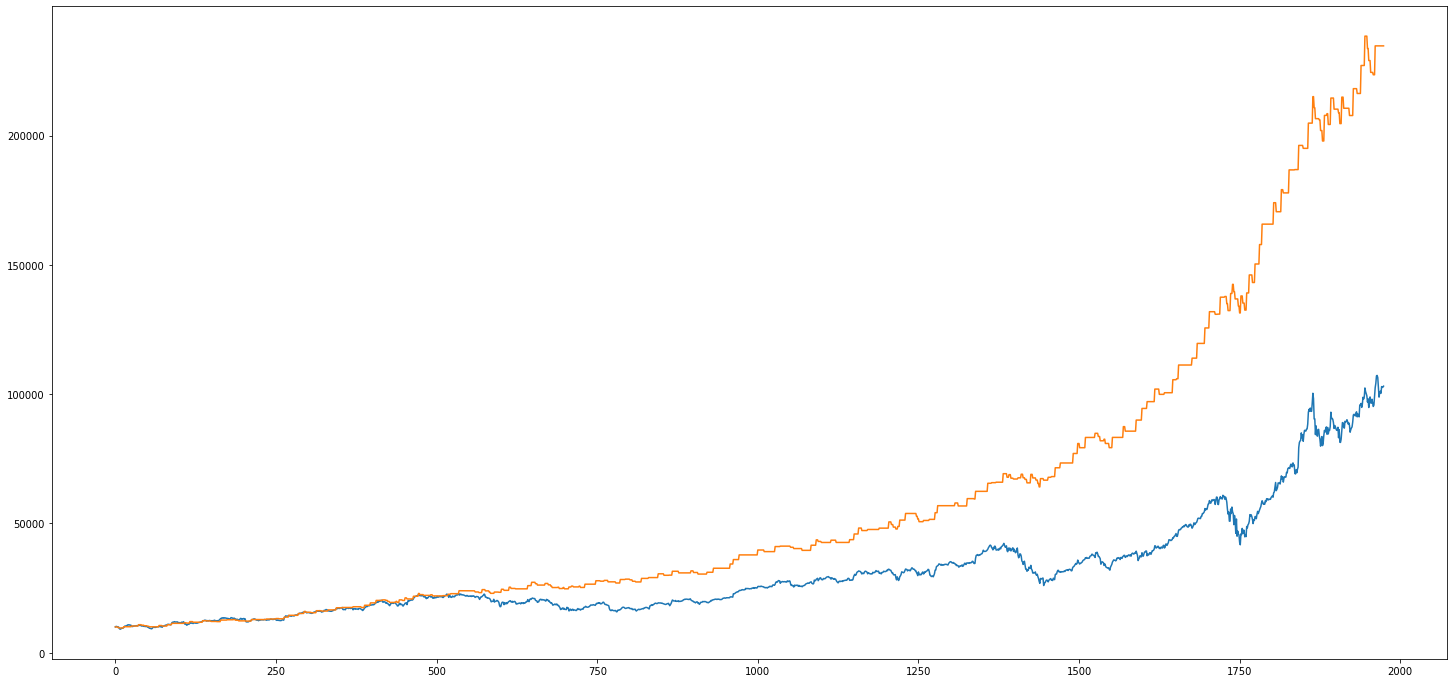

In [39]:
plt.figure(figsize = (25,12))
plt.plot(BH)
plt.plot(EC)

In [40]:
analysis

,Open,High,Low,Close,Volume,MA9,MA50,MA200,label,trailing
Date,,,,,,,,,,
2013-04-09,13.309701,13.376504,13.197007,13.329055,2.680043e+08,13.491108,13.929278,17.302808,0,0.000000
2013-04-10,13.364019,13.643724,13.298775,13.600956,3.285902e+08,13.434258,13.922077,17.280717,1,13.328937
2013-04-11,13.539458,13.672755,13.460791,13.558501,2.870159e+08,13.405364,13.908789,17.259655,1,13.328937
2013-04-12,13.552884,13.552884,13.394926,13.417090,2.085664e+08,13.408452,13.893565,17.237205,1,13.328937
2013-04-15,13.329684,13.357468,13.097117,13.106483,2.775371e+08,13.373974,13.872962,17.214945,1,0.000000
2013-04-16,13.160172,13.317505,13.128955,13.305956,2.672677e+08,13.354030,13.857508,17.193488,1,13.039837
2013-04-17,13.119590,13.129892,12.427820,12.574227,8.260521e+08,13.267594,13.834434,17.167992,1,0.000000
2013-04-18,12.642594,12.667568,12.166534,12.238646,5.823971e+08,13.159548,13.795015,17.141657,1,11.993873
2013-04-19,12.111282,12.474336,12.021688,12.191197,5.325531e+08,13.035790,13.754951,17.112785,1,11.993873
